In [ ]:

import numpy as np
import pandas as pd
import xgboost as xgb
from google.colab import files
upload = files.upload()


Saving IB_clean.csv to IB_clean.csv


In [ ]:
df = pd.read_csv('IB_clean.csv')
df.head()

,annual_income,credit_score,investment_experience,risk_tolerance,investment_duration,market_sentiment_score,expected_annual_return,net_worth,asset_to_debt_ratio,income_to_debt_ratio
0,651279,727,4,2,15,0.21,9.23,697490,3.773408,2.589661
1,2170230,638,2,1,5,-0.53,9.61,782499,1.879091,2.438124
2,789570,681,11,2,21,-0.80,10.76,2504249,6.013291,1.580651
3,2350731,703,19,0,14,-0.69,15.12,3186753,7.489380,4.786938
4,1621685,728,3,0,2,-0.51,10.47,1457857,39.060176,42.337223


In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop('expected_annual_return', axis=1)
y = df['expected_annual_return']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Get all base columns (exclude net_worth and asset_to_debt_ratio)
base_cols = [col for col in x_train.columns if col not in ['net_worth', 'asset_to_debt_ratio']]

# 1️ Only net_worth
x_train_1 = x_train[base_cols + ['net_worth']]
x_test_1 = x_test[base_cols + ['net_worth']]

# 2️ Only asset_to_debt_ratio
x_train_2 = x_train[base_cols + ['asset_to_debt_ratio']]
x_test_2 = x_test[base_cols + ['asset_to_debt_ratio']]

# 3️ Both features
x_train_3 = x_train[base_cols + ['net_worth', 'asset_to_debt_ratio']]
x_test_3 = x_test[base_cols + ['net_worth', 'asset_to_debt_ratio']]


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
def evaluate_model(x_train,x_test,y_train,y_test):
  model = XGBRegressor(random_state=42)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  print(f'MSE: {mse}')
  print(f'R2: {r2}')
  print(f'MAE: {mae}')
  return y_pred # Return the predicted values

In [ ]:
print("1️ Model with net_worth only:")
z1 = evaluate_model(x_train_1, x_test_1, y_train, y_test)
z1

print("2️ Model with asset_to_debt_ratio only:")
z2 = evaluate_model(x_train_2, x_test_2, y_train, y_test)
z2

print("3️ Model with both features:")
z3 = evaluate_model(x_train_3, x_test_3, y_train, y_test)
z3

1️ Model with net_worth only:
MSE: 1.712857759990761
R2: 0.7320557038797957
MAE: 1.085399892807007
2️ Model with asset_to_debt_ratio only:
MSE: 2.375435339289833
R2: 0.6284079362383796
MAE: 1.3668898639678957
3️ Model with both features:
MSE: 1.6012655883545857
R2: 0.7495121947688823
MAE: 1.0734184608459472


array([16.497725,  9.092967, 16.73678 , 11.722975,  8.924039, 12.438983,
       14.047819, 11.851645, 15.005801,  8.745952, 15.922102, 12.447617,
        8.678393, 11.678185, 13.697647, 11.660336, 13.763497, 11.71314 ,
       12.537185, 11.049335], dtype=float32)

HERE WE SEE NET WORTH IS NOT A GOOD INDICATOR WITH A R2 OF 0.62 WHEREAS THE OTHER 2 OPTIONS ALMOST GIVE IDENTICAL RESULTS WITH THE MODEL WITH BOTH FEATURES GIVING THE BEST RESULTS

In [ ]:
import matplotlib.pyplot as plt

def plot_predictions(y_test, y_pred, title):
    plt.figure(figsize=(6, 5))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual ROI")
    plt.ylabel("Predicted ROI")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


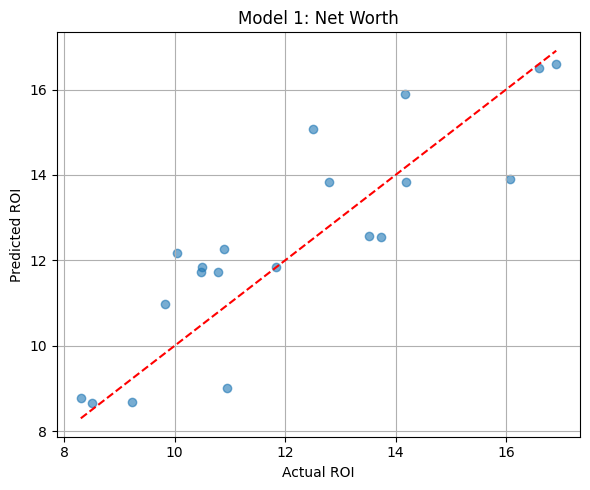

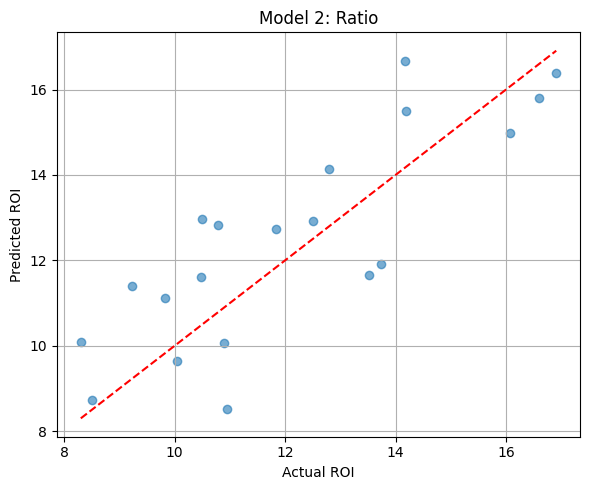

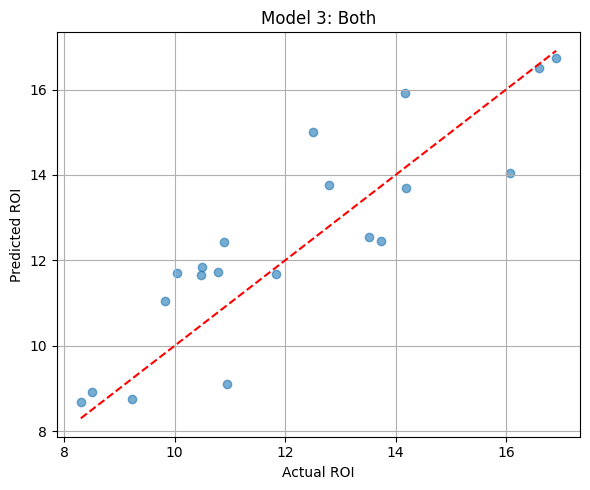

In [ ]:
plot_predictions(y_test, z1, "Model 1: Net Worth")
plot_predictions(y_test, z2, "Model 2: Ratio")

plot_predictions(y_test, z3, "Model 3: Both")



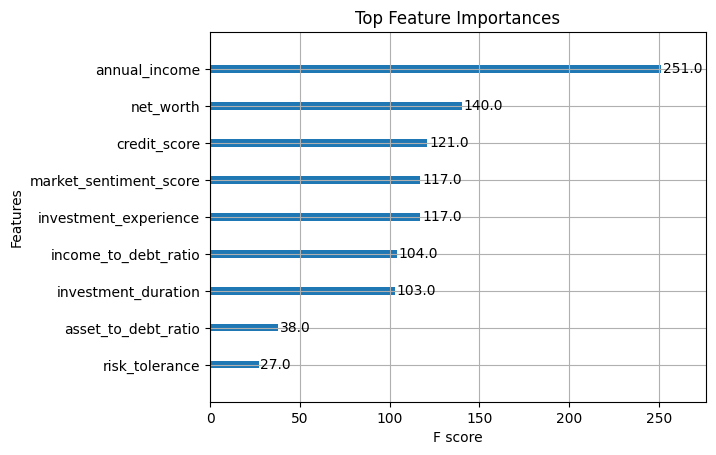

In [ ]:
model = XGBRegressor(random_state=42)
model.fit(x_train_3, y_train)
xgb.plot_importance(model, max_num_features=10)
plt.title("Top Feature Importances")
plt.show()


In [ ]:
import joblib

# Save the best-performing model (e.g., model3)
joblib.dump(z3, 'roi_predictor_model.pkl')


['roi_predictor_model.pkl']

In [ ]:
files.download('roi_predictor_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>